In [61]:
import numpy as np
from src.features.upemd import  UPEMD

In [62]:
import matplotlib.pyplot as plt 

In [63]:
sample_rate = 1000
seconds = 10
num_samples = sample_rate*seconds
time_vect = np.linspace(0, seconds, num_samples)


In [134]:
x = np.cos(2 * np.pi * 1 * time_vect)
x += np.sin(2 * np.pi * 5 * time_vect)  

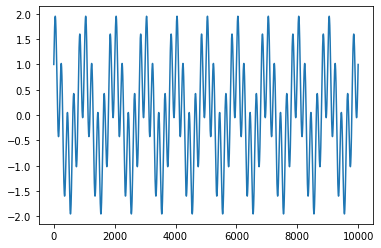

In [135]:
plt.plot(x)

In [136]:
upemd = UPEMD(num_imf=2)

In [137]:
imfs = upemd.upemd(x)

In [138]:
imfs.shape
print(len(imfs.T))

2


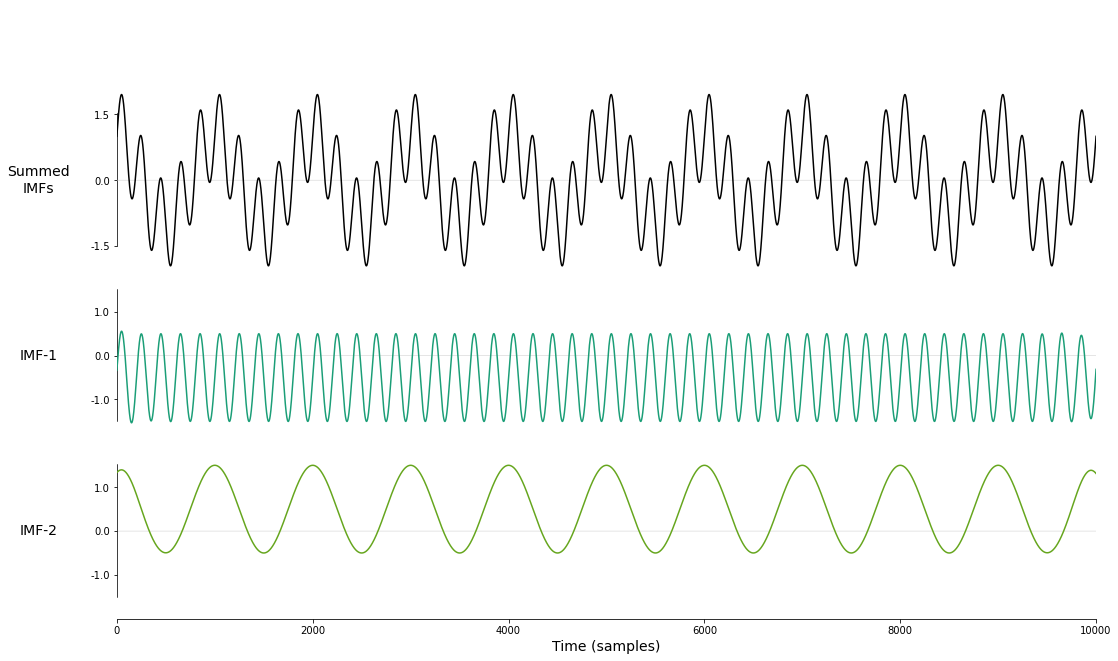

In [139]:
upemd.plot_imf()

In [144]:
import emd 
from scipy import ndimage


freq_edges, freq_centres = emd.spectra.define_hist_bins(0.1, 10, 24*3, 'linear')
time_centres = np.arange(num_samples)-.5
IP, IF, IA = emd.spectra.frequency_transform(imfs, sample_rate, 'nht')
f, hht = emd.spectra.hilberthuang(IF[:, 0], IA[:, 0], freq_edges, mode='amplitude', sum_time=False)
hht = ndimage.gaussian_filter(hht, 1)


<AxesSubplot:title={'center':'Hilbert-Huang Transform'}, xlabel='Time', ylabel='Frequency'>

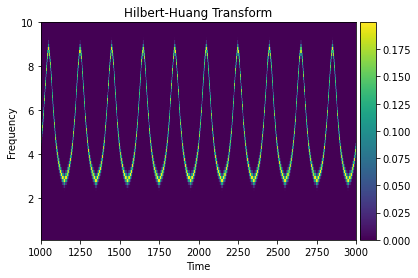

In [145]:
emd.plotting.plot_hilberthuang(hht, time_centres, freq_centres,cmap='viridis', time_lims=(1000, 3000),  log_y=False)
